In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [16, 8]
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-colorblind')

In [3]:
df = pd.read_pickle('../data/processed/intersections_sev_full')

In [176]:
df.head()

COUNT SUBAREA  \
INTKEY  LOCATION                               YEAR                  
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005      1    BLRD   
                                               2009      1    BLRD   
                                               2012      1    BLRD   
                                               2013      2    BLRD   
                                               2018      1    BLRD   

                                                     ARTERIALCLASSCD  \
INTKEY  LOCATION                               YEAR                    
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005              2.0   
                                               2009              2.0   
                                               2012              2.0   
                                               2013              2.0   
                                               2018              2.0   

                                                    SIGNAL_TYPE  \
INTKEY  LOCATION                               YEAR               
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005        NONE   
                                               2009        NONE   
                                               2012        NONE   
                                               2013        NONE   
                                               2018        NONE   

                                                                                   UNITDESC  \
INTKEY  LOCATION                               YEAR                                           
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005  GOLDEN GARDENS DR NW AND SEAVIEW PL NW   
                                               2009  GOLDEN GARDENS DR NW AND SEAVIEW PL NW   
                                               2012  GOLDEN GARDENS DR NW AND SEAVIEW PL NW   
                                               2013  GOLDEN GARDENS DR NW AND SEAVIEW PL NW   
                                               2018  GOLDEN GARDENS DR NW AND SEAVIEW PL NW   

                                                     WEIGH_FATALITIES  \
INTKEY  LOCATION                               YEAR                     
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005               0.0   
                                               2009               0.0   
                                               2012               0.0   
                                               2013               0.0   
                                               2018               0.0   

                                                     WEIGH_SERIOUS  \
INTKEY  LOCATION                               YEAR                  
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005            0.0   
                                               2009            0.0   
                                               2012            0.0   
                                               2013            4.0   
                                               2018            0.0   

                                                     WEIGH_EVIDENT  \
INTKEY  LOCATION                               YEAR                  
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005            0.0   
                                               2009            0.0   
                                               2012            0.0   
                                               2013            0.0   
                                               2018            3.0   

                                                     WEIGH_POSSIBLE  \
INTKEY  LOCATION                               YEAR                   
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005             0.0   
                                               2009             0.0   
                                               2012             0.0   
                                               2013             0.0   
 

In [5]:
df['DATETIME'] = pd.to_datetime(df['DATE']).dropna()

In [6]:
#df = df[df.index < '2019-01-01']

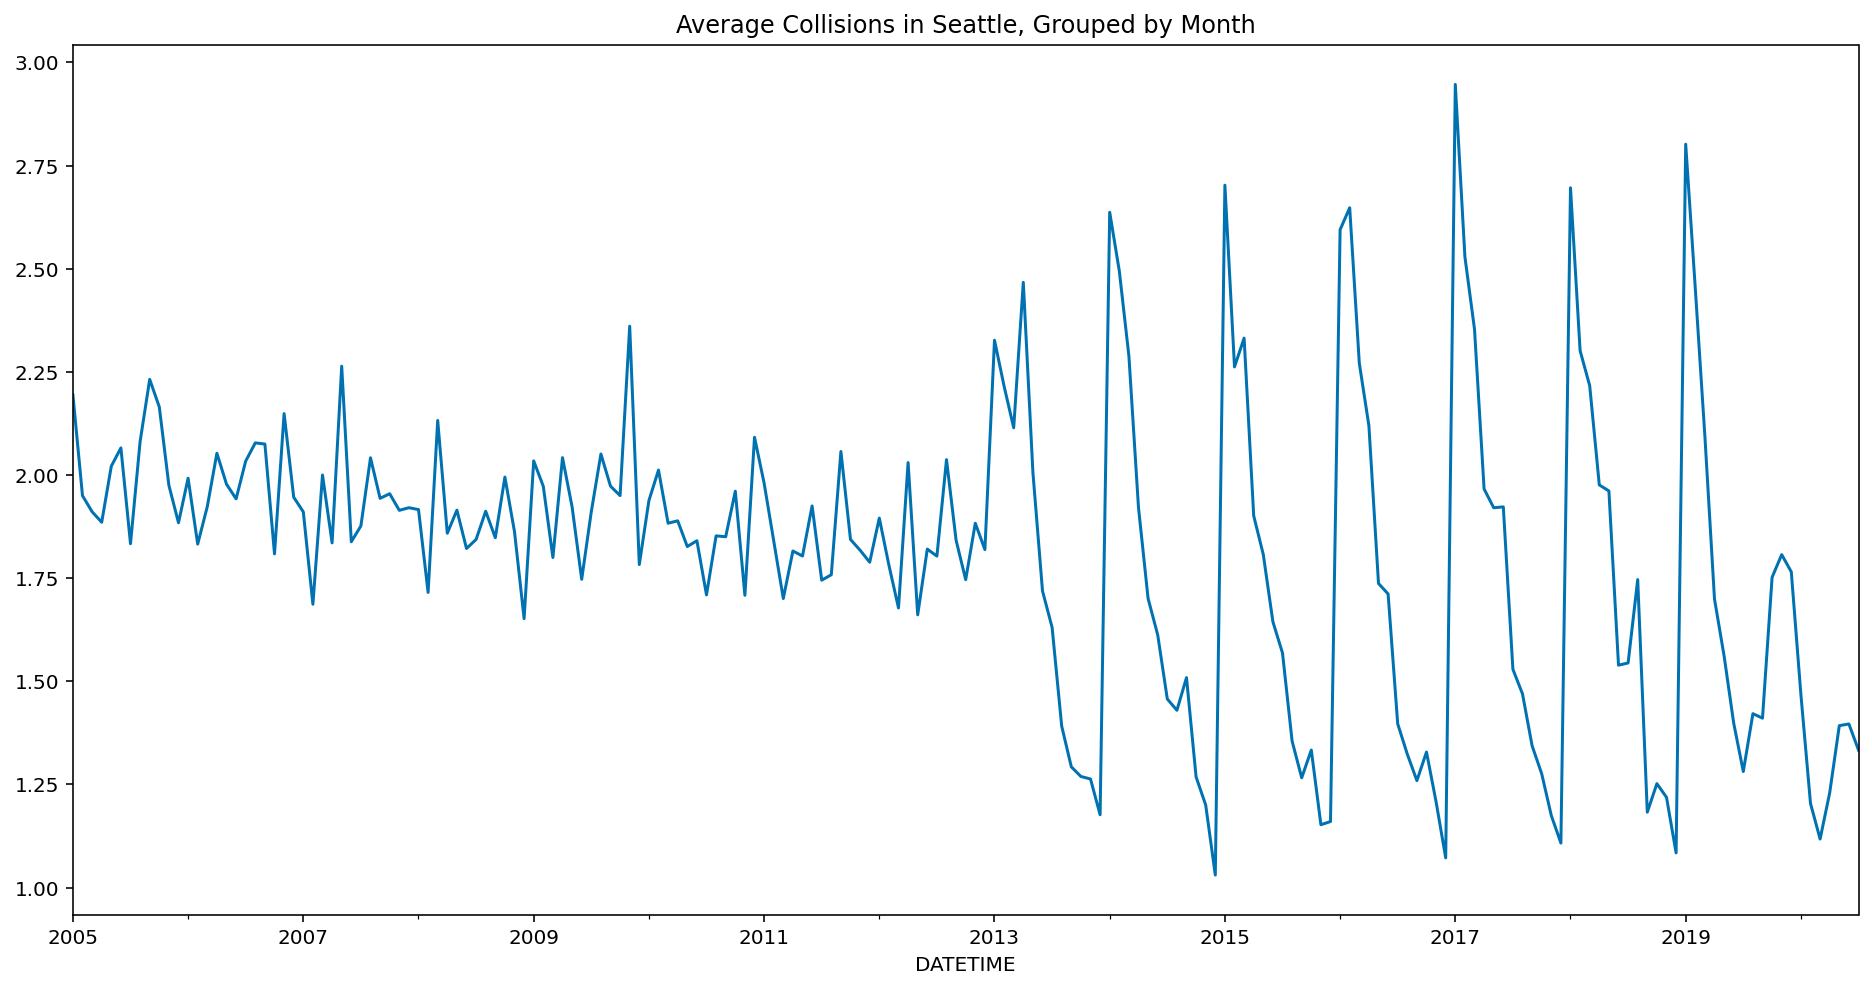

In [7]:
df.groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].mean().plot(title='Average Collisions in Seattle, Grouped by Month');

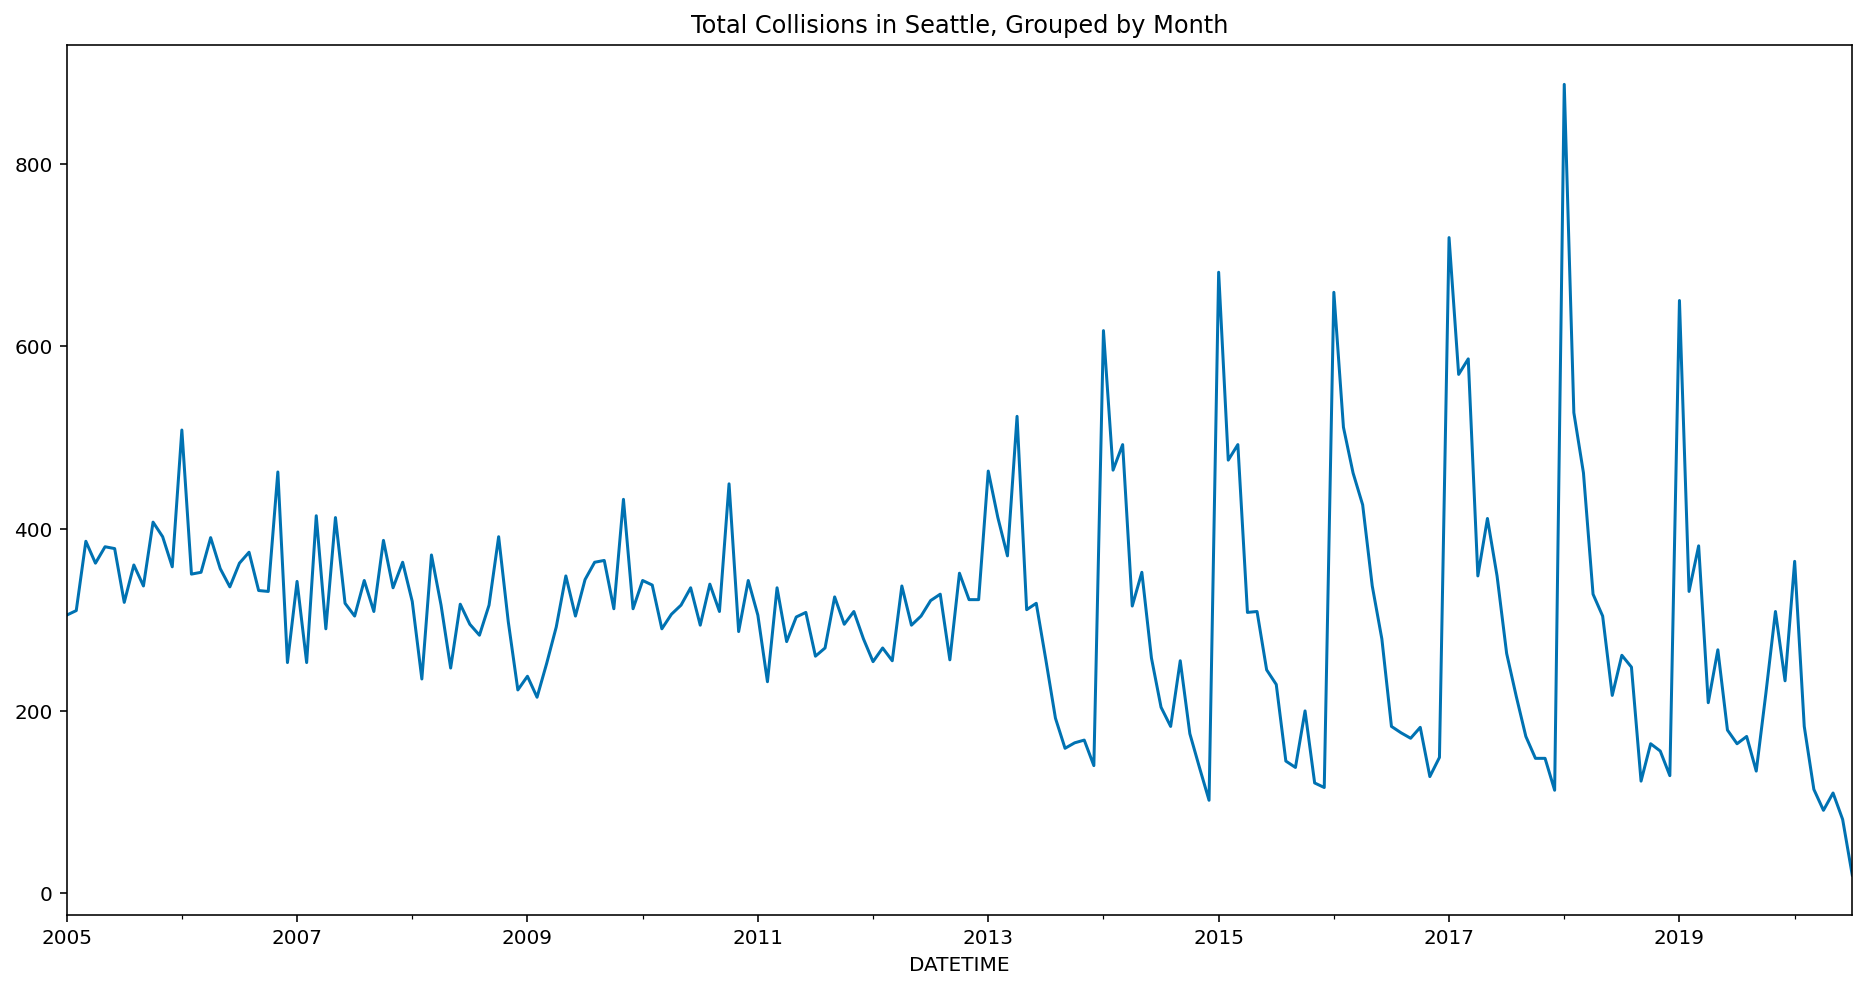

In [8]:
df.groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].sum().plot(title='Total Collisions in Seattle, Grouped by Month');

Some interesting policy take aways:

better data keeping practices and management (improvements in recent years), more understanding of traffic flow, more sensor data, street feature data

fatalities happen largely on street blocks

they're twice as likely on major arterirals (class 1) compared to class 2 
class 2 is 4 times as likely as class 3, class 4 and 5 are not sights of fatal accidents

similar ratios are seen for serious and evident injuries

find ways to encourage taxis and public transit for nightlife and less cars traveling at night and during inclimate weather



In [9]:
#df = df.set_index(['ARTERIALCLASSCD'])

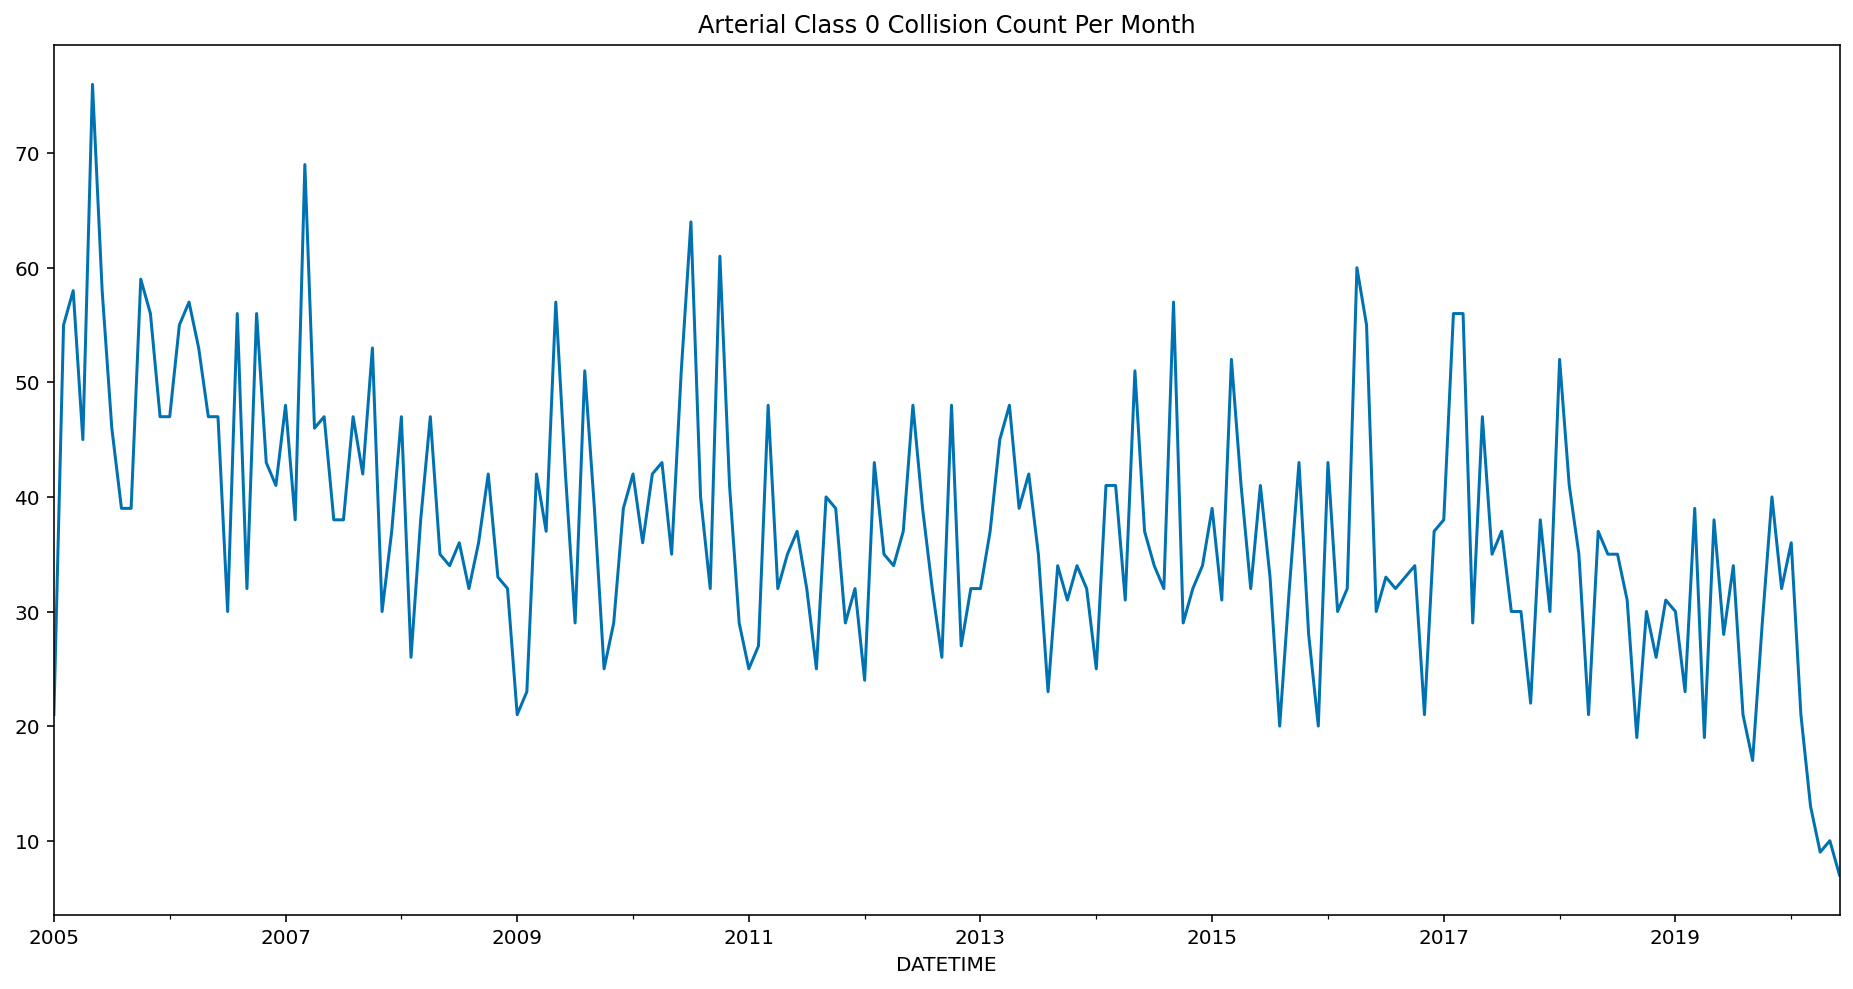

In [10]:
art_class=0
df[df['ARTERIALCLASSCD'] == art_class].groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].sum().plot(title=f'Arterial Class {art_class} Collision Count Per Month');

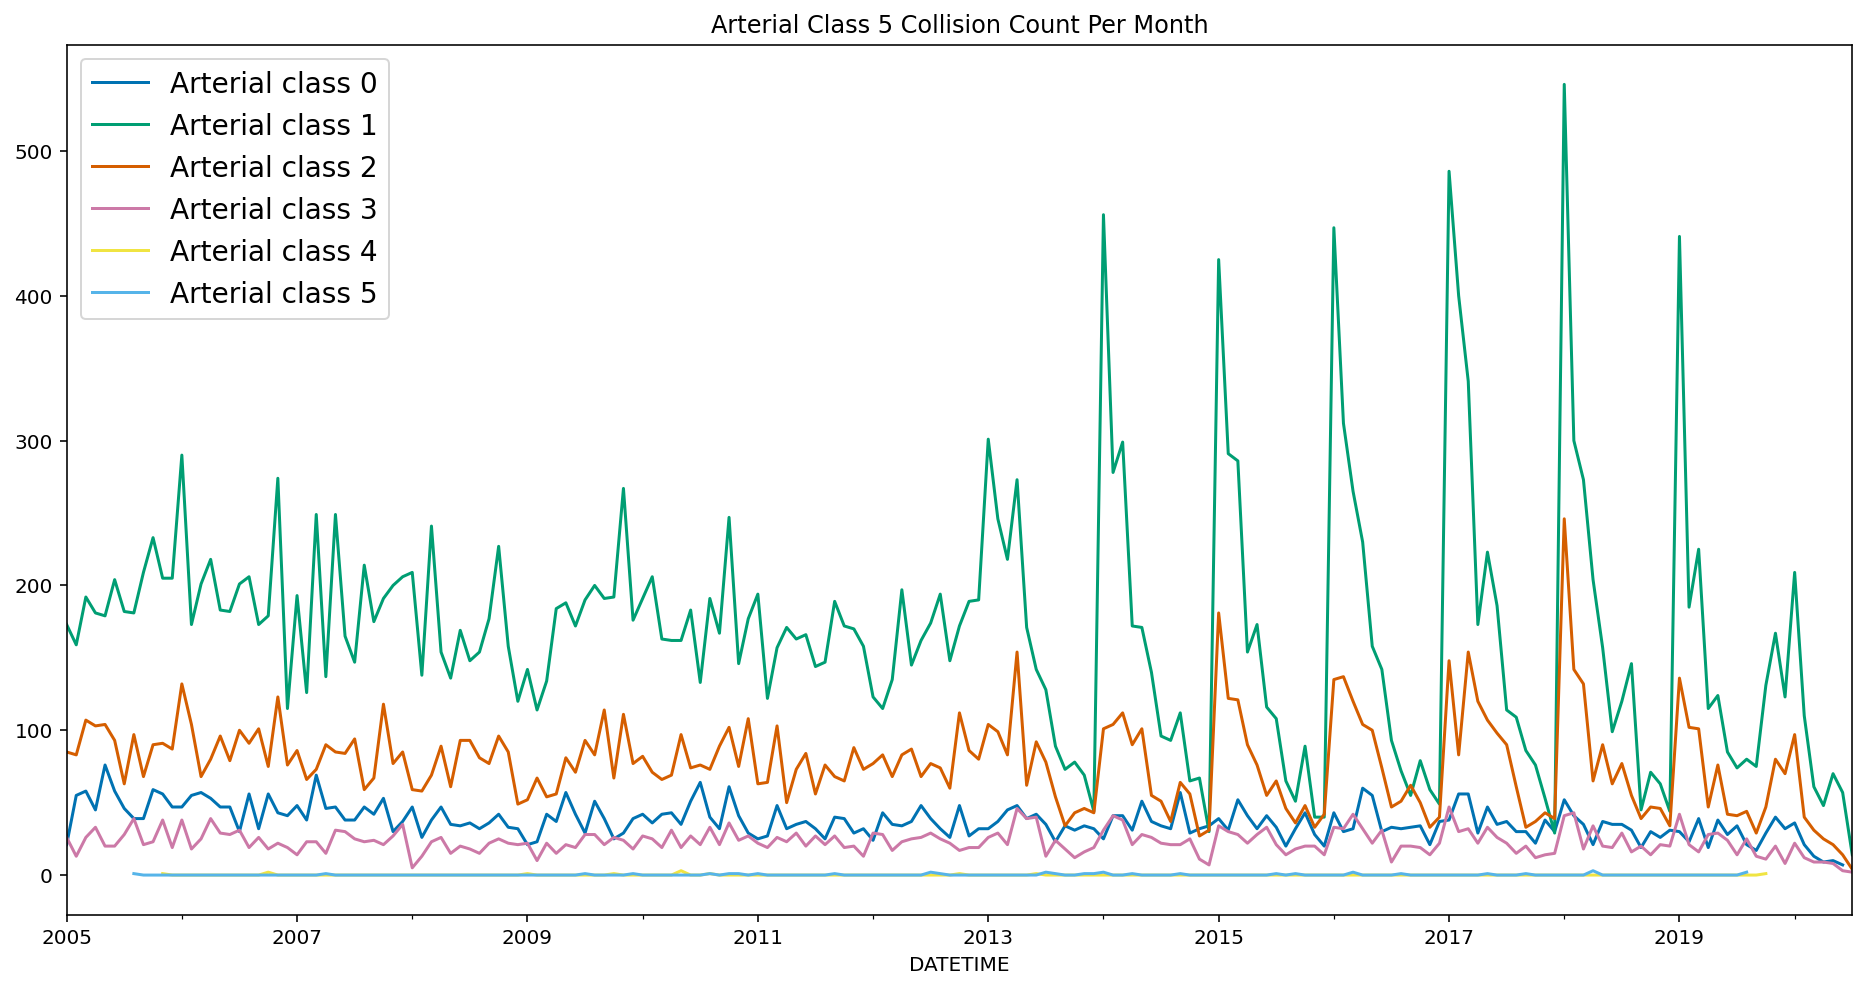

In [11]:
for art_class in range(6):
    df[df['ARTERIALCLASSCD'] == art_class]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'Arterial class {art_class}',title=f'Arterial Class {art_class} Collision Count Per Month')\
    .legend(loc='best', fontsize=14);


Apppears to be high seasonality in arterial class 1 early in the year. I would guess snow. let's see.

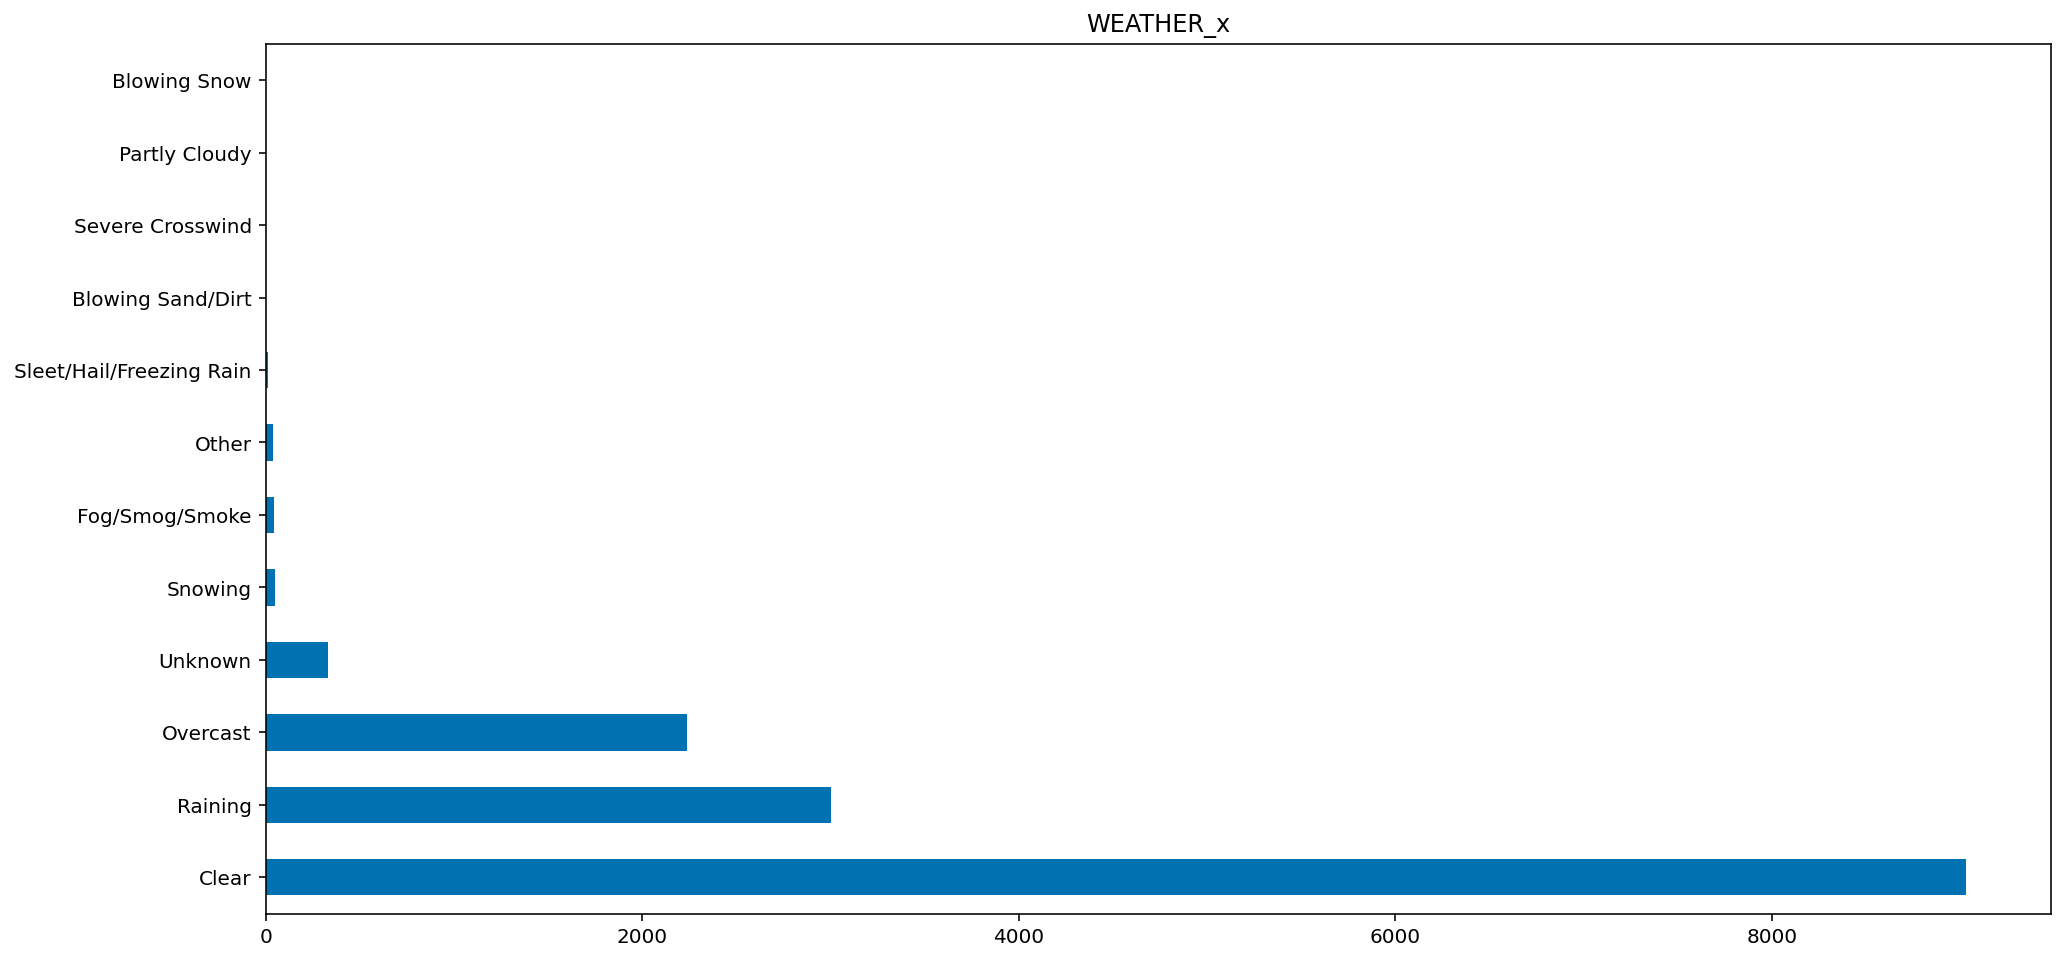

In [12]:
col = 'WEATHER_x'
df[df['ARTERIALCLASSCD'] == 1][col].value_counts().plot(kind='barh')\
.set_title(f'{col}');

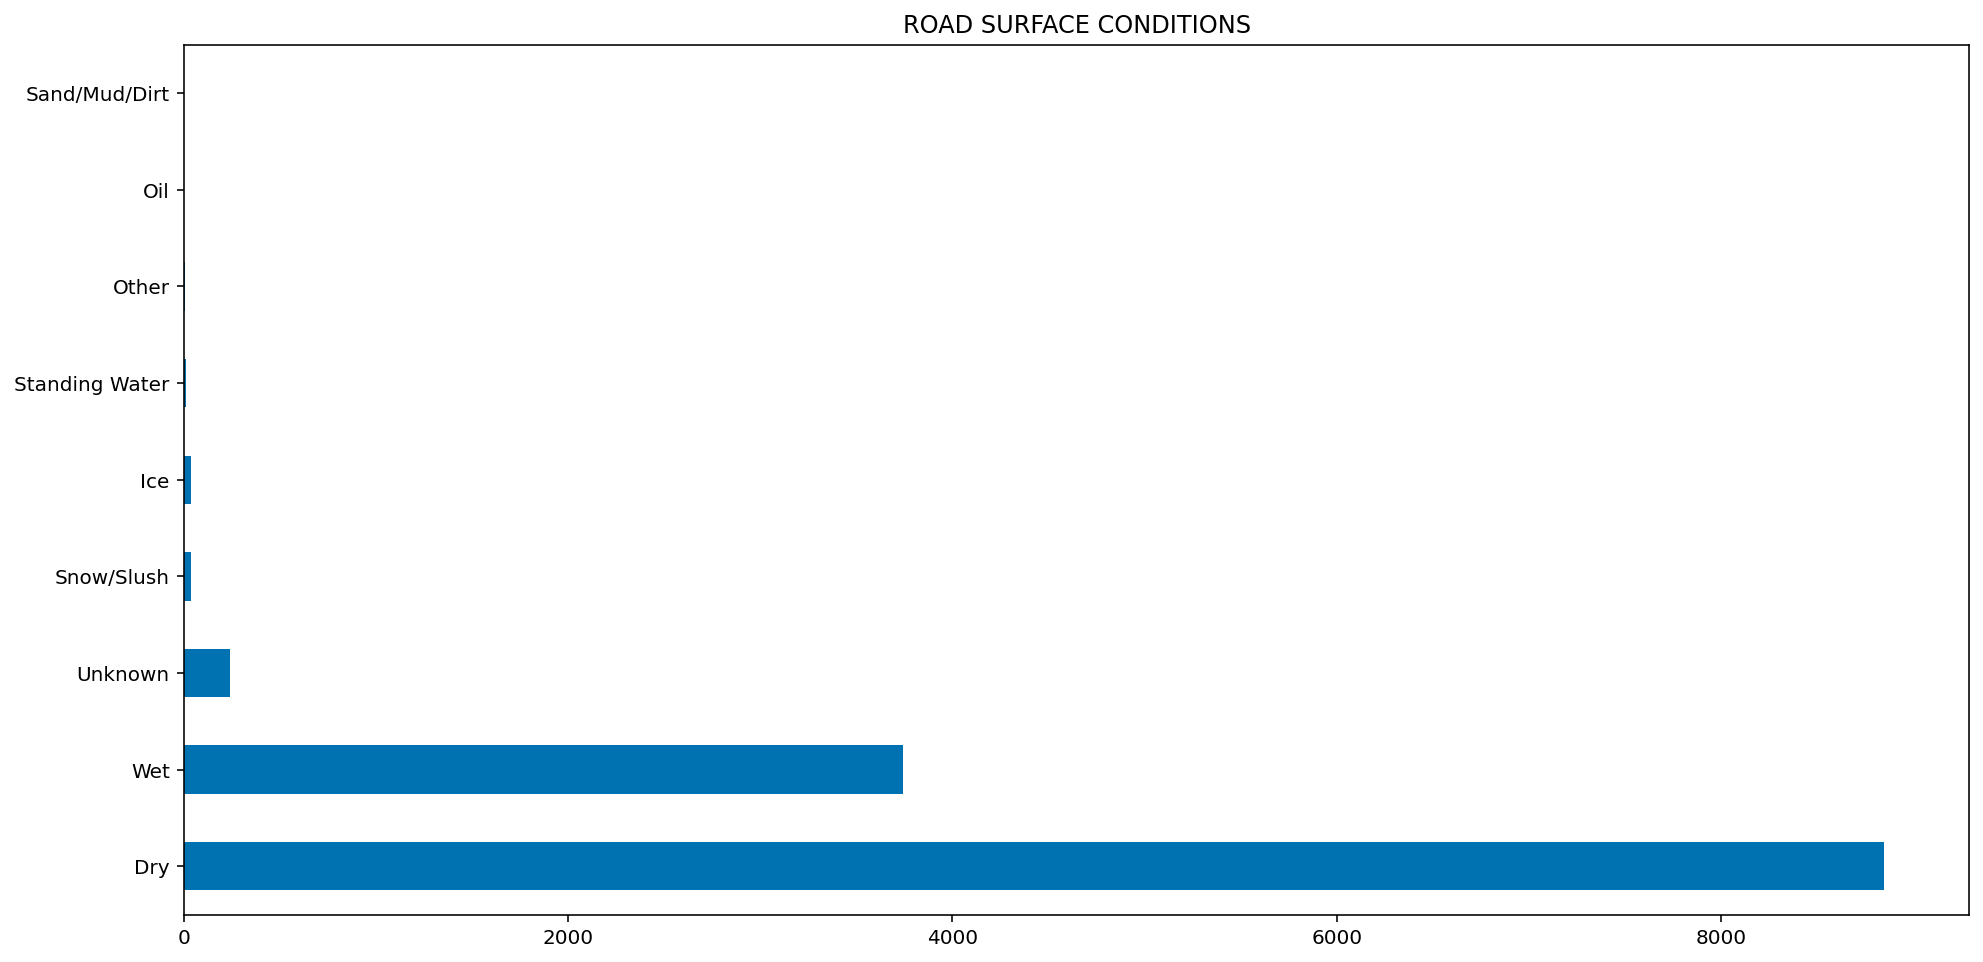

In [13]:
col='ROAD SURFACE CONDITIONS'
df[df['ARTERIALCLASSCD'] == 1][col].value_counts().plot(kind='barh')\
.set_title(f'{col}');

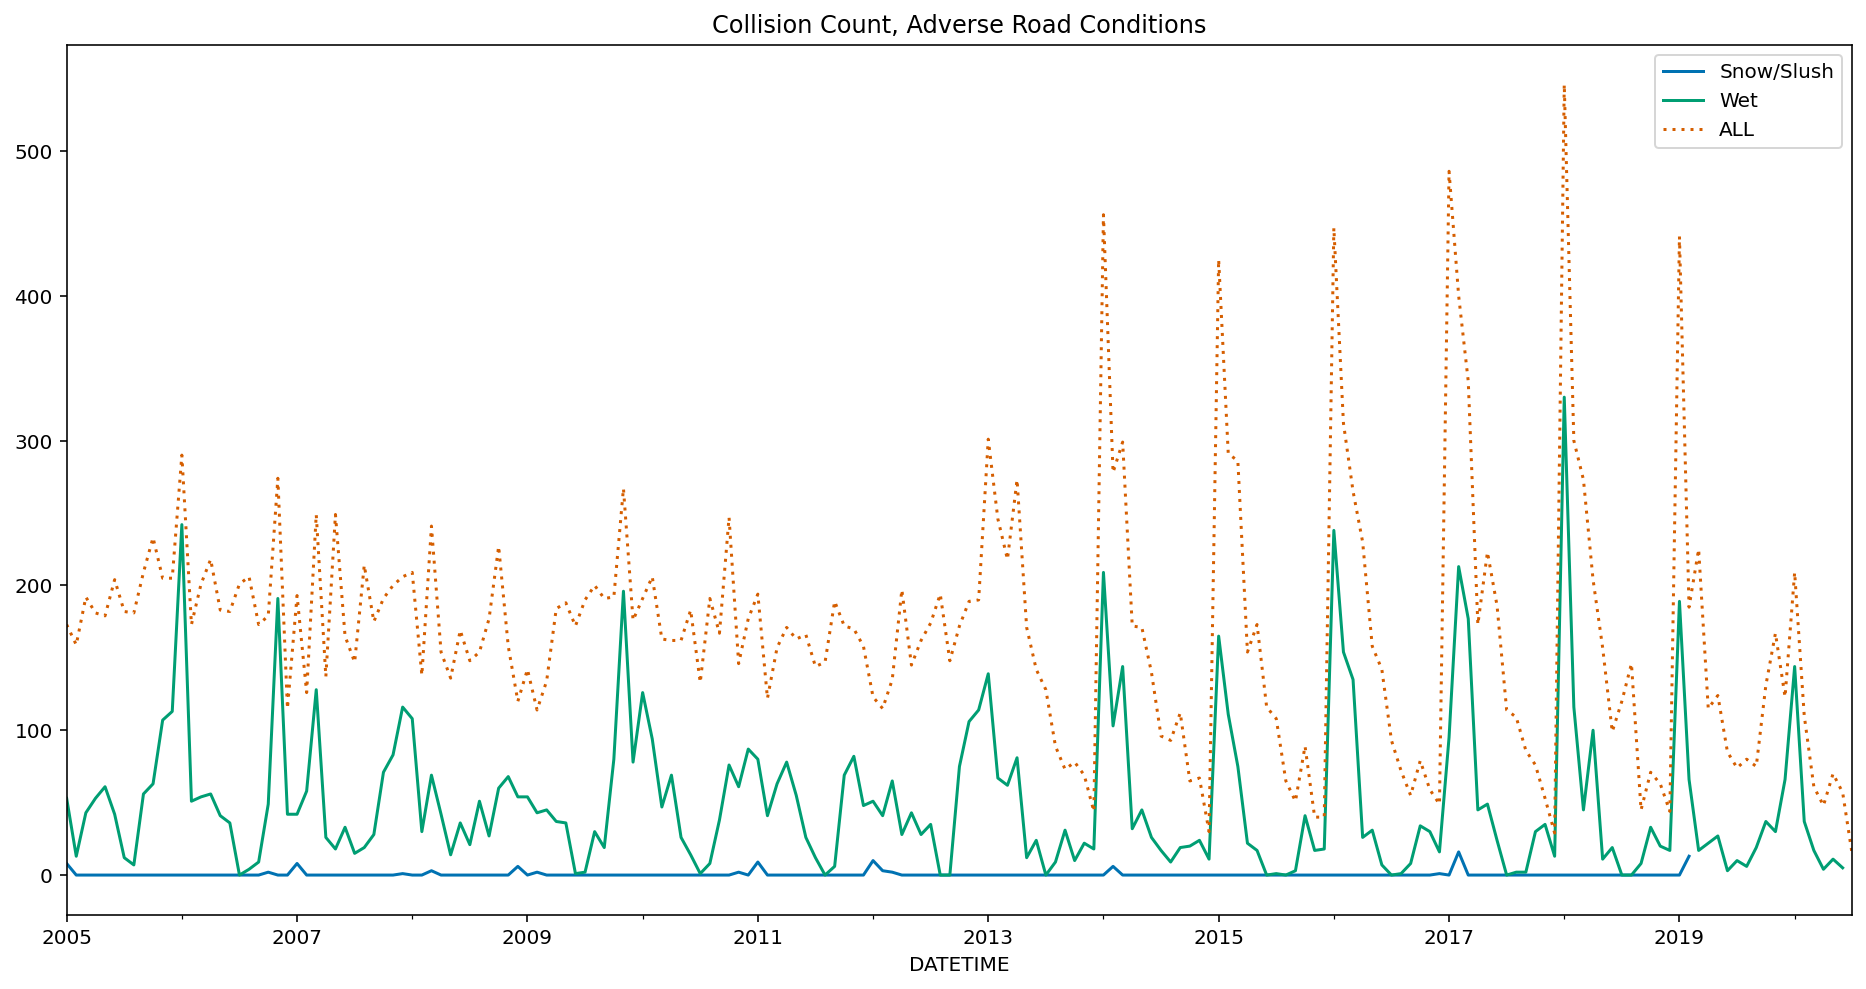

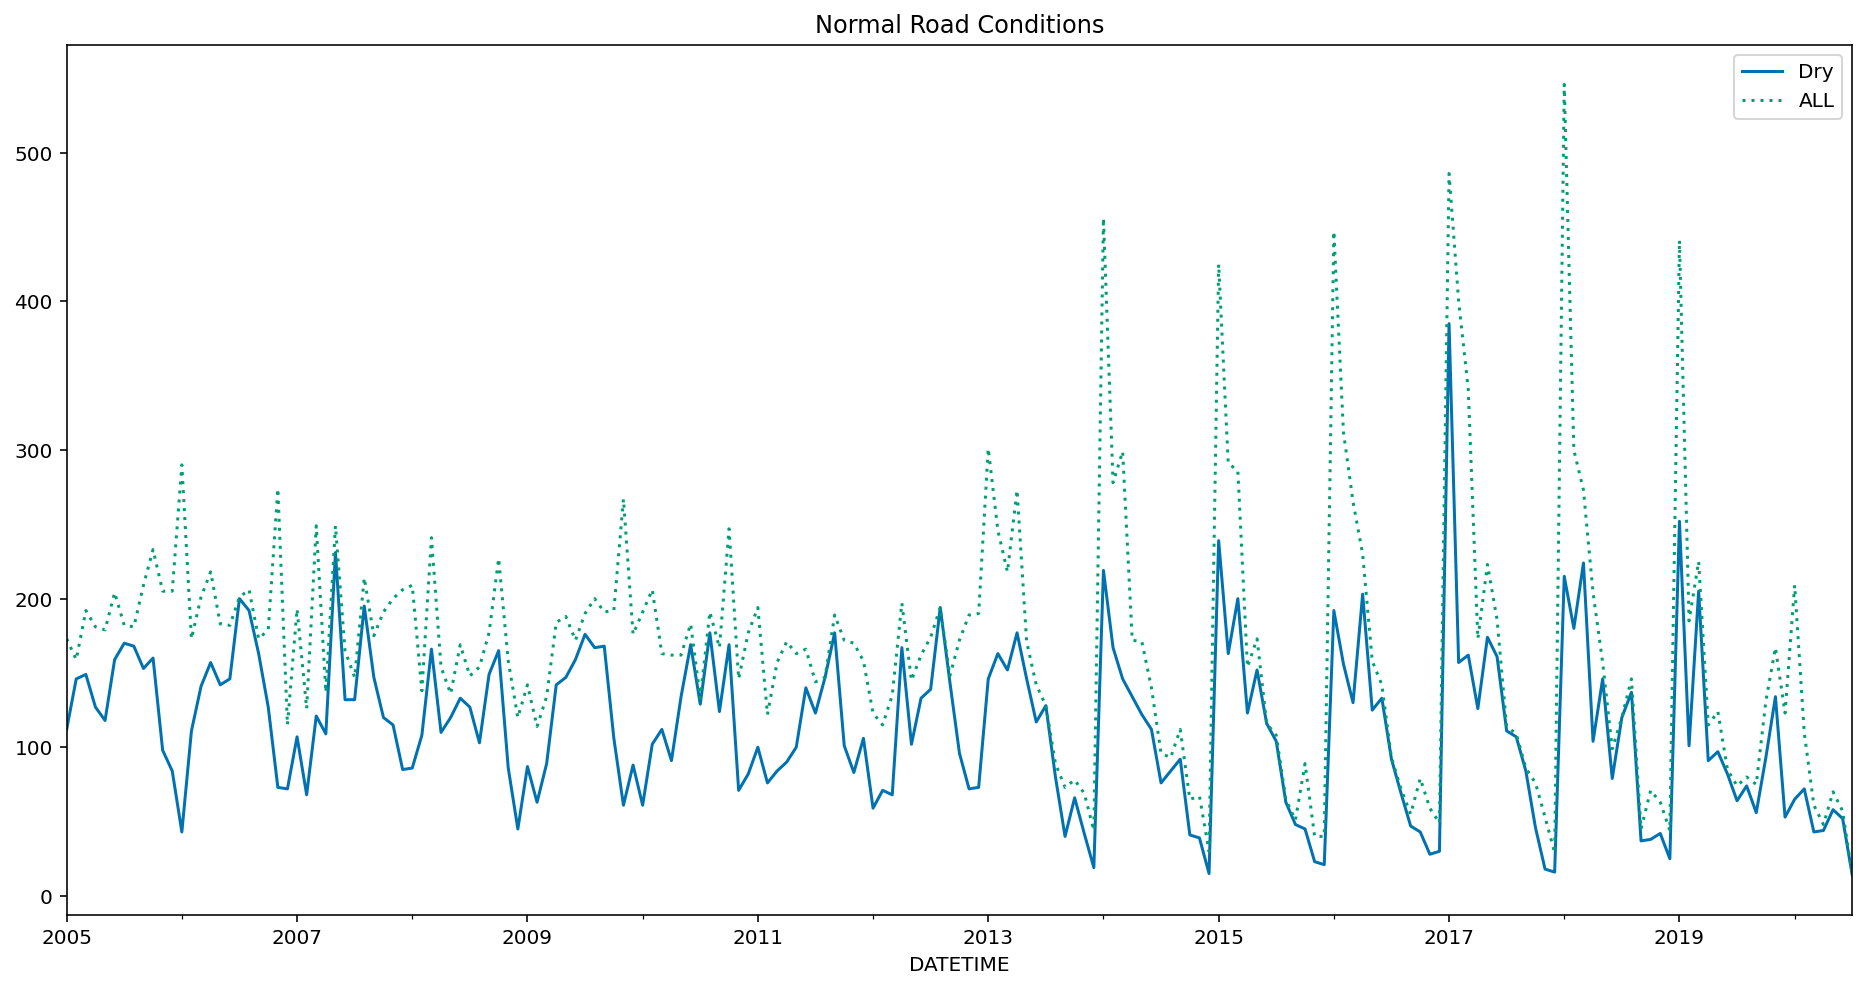

In [174]:
col='ROAD SURFACE CONDITIONS'
cond='Snow/Slush'
df[(df['ARTERIALCLASSCD'] == 1) & (df[col] == cond)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'{cond}')
cond='Wet'
df[(df['ARTERIALCLASSCD'] == 1) & (df[col] == cond)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'{cond}')
df[(df['ARTERIALCLASSCD'] == 1)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label='ALL',linestyle=(0, (1,2)), title='Collision Count, Adverse Road Conditions').legend();
plt.show()

cond='Dry'
df[(df['ARTERIALCLASSCD'] == 1) & (df[col] == cond)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'{cond}', title='Normal Road Conditions')
df[(df['ARTERIALCLASSCD'] == 1)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label='ALL',linestyle=(0, (1,2))).legend();

We see the seasonal trend 2014 onwards across the major road conditions (dry, wet, as well as snow/slush). I interpret this as saying the seasonality being due to another factor.

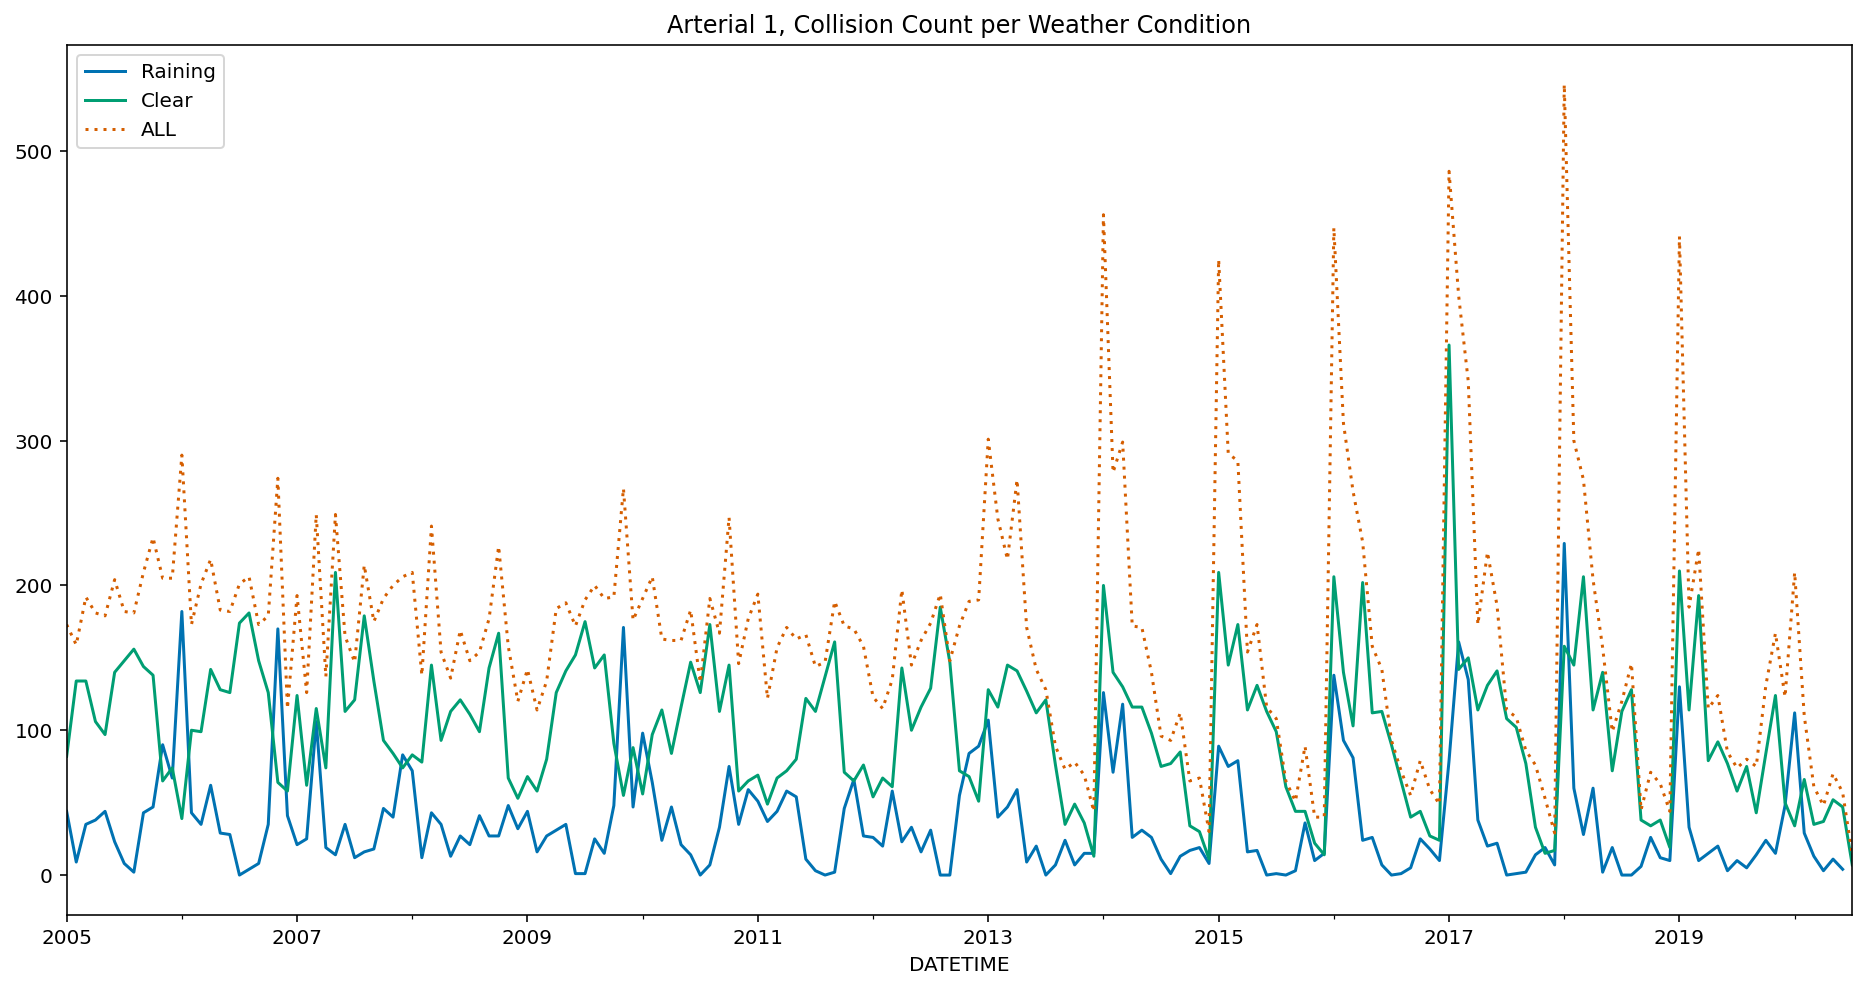

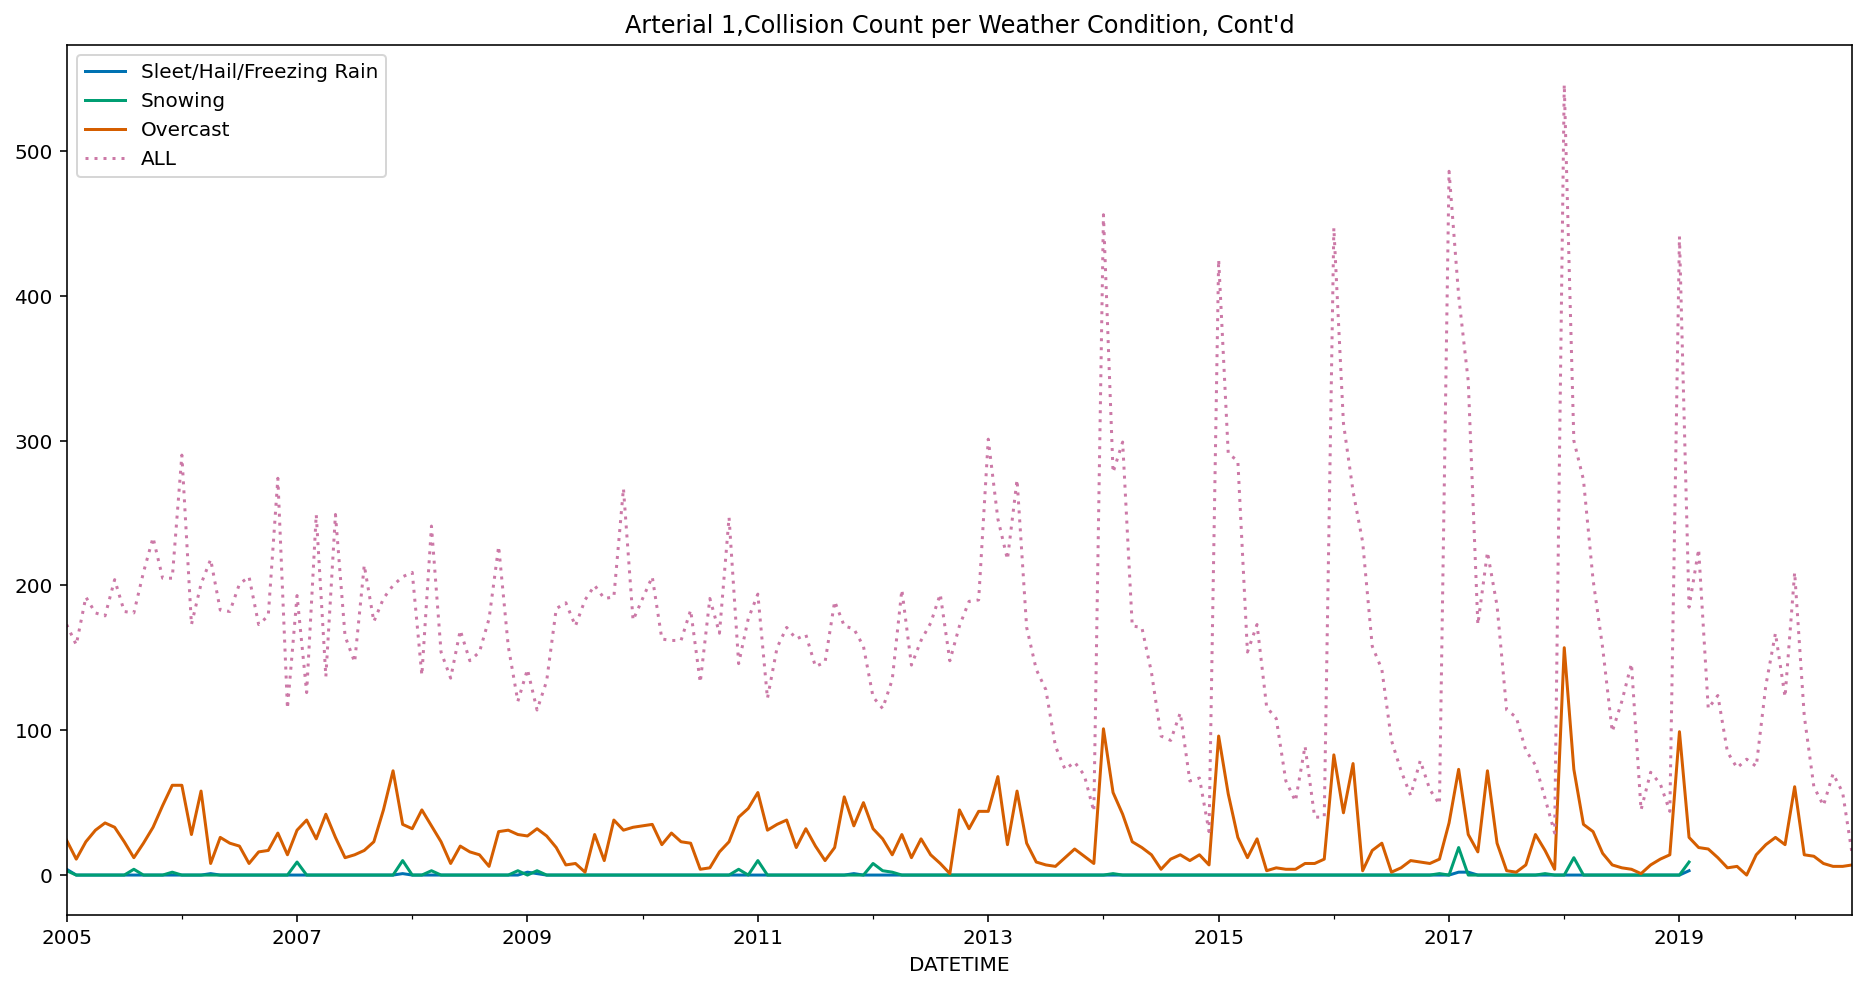

In [173]:
col='WEATHER_x'
cond='Raining'
df[(df['ARTERIALCLASSCD'] == 1) & (df[col] == cond)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'{cond}')
cond='Clear'
df[(df['ARTERIALCLASSCD'] == 1) & (df[col] == cond)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'{cond}')
df[(df['ARTERIALCLASSCD'] == 1)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label='ALL',linestyle=(0, (1,2)), title='Arterial 1, Collision Count per Weather Condition').legend(loc='upper left');
plt.show()

#Plot 2
cond='Sleet/Hail/Freezing Rain'
df[(df['ARTERIALCLASSCD'] == 1) & (df[col] == cond)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'{cond}')
cond='Snowing'
df[(df['ARTERIALCLASSCD'] == 1) & (df[col] == cond)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'{cond}')
cond='Overcast'
df[(df['ARTERIALCLASSCD'] == 1) & (df[col] == cond)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'{cond}')
df[(df['ARTERIALCLASSCD'] == 1)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label='ALL',linestyle=(0, (1,2)), title="Arterial 1,Collision Count per Weather Condition, Cont'd").legend(loc='best');
plt.show()

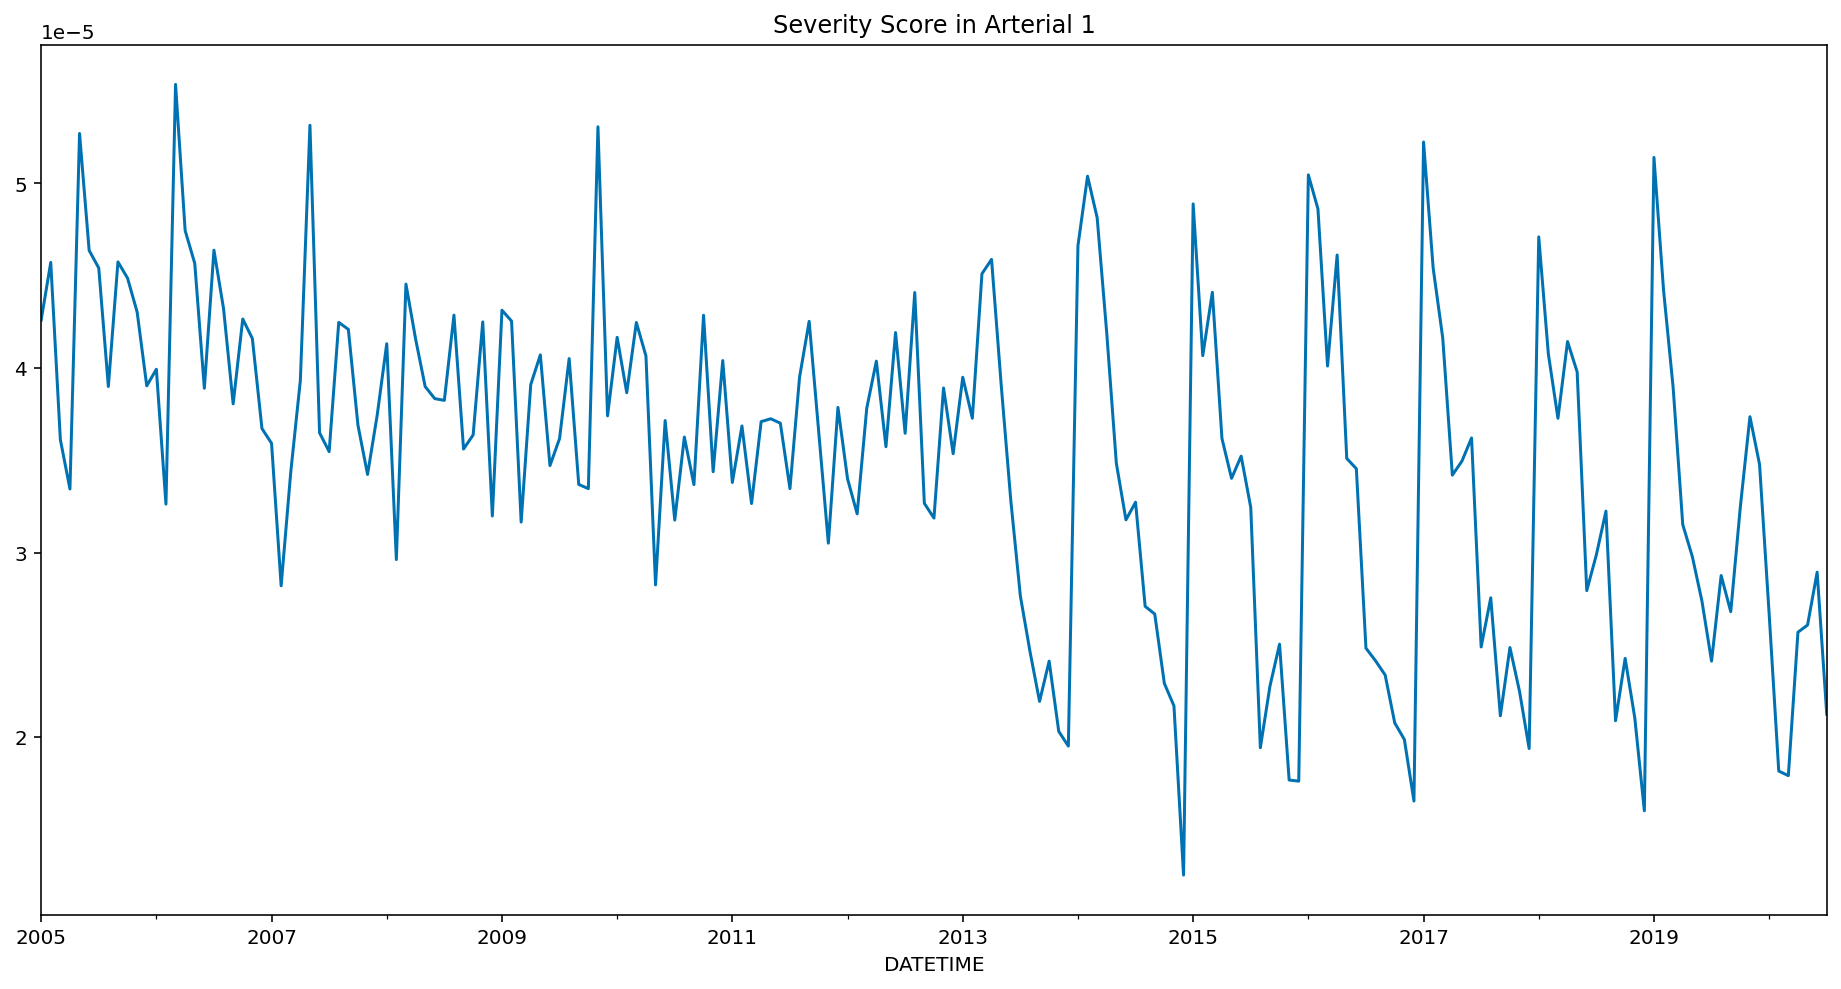

In [16]:
df[(df['ARTERIALCLASSCD'] == 1)]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['sev_score']\
    .mean()\
    .plot(label='Severity Score', title='Severity Score in Arterial 1')
# df[(df['ARTERIALCLASSCD'] == 1)]\
#     .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
#     .sum()\
#     .plot(label='ALL',linestyle=(0, (1,2)), title='Weather Conditions').legend();
# plt.show()

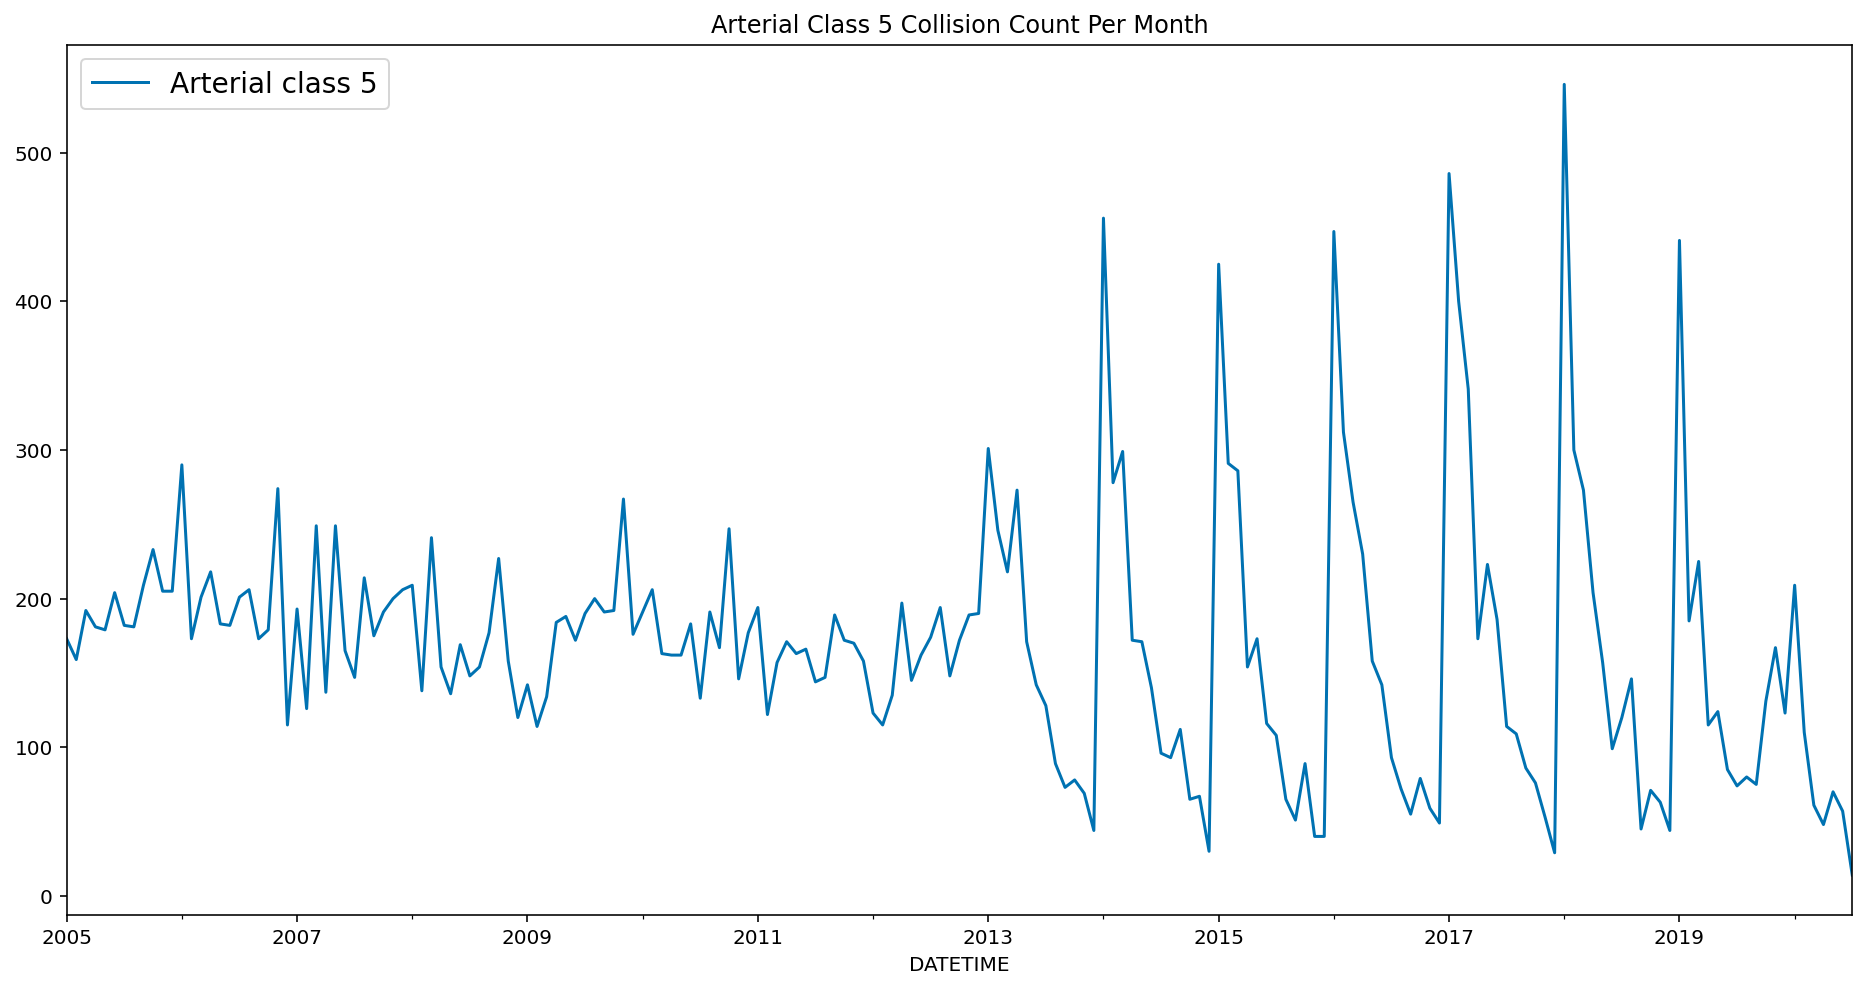

In [17]:
df[df['ARTERIALCLASSCD'] == 1]\
    .groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT']\
    .sum()\
    .plot(label=f'Arterial class {art_class}',title=f'Arterial Class {art_class} Collision Count Per Month')\
    .legend(loc='best', fontsize=14);

In [45]:
df_2013 = df[df['DATETIME'] > '2013-01-01']

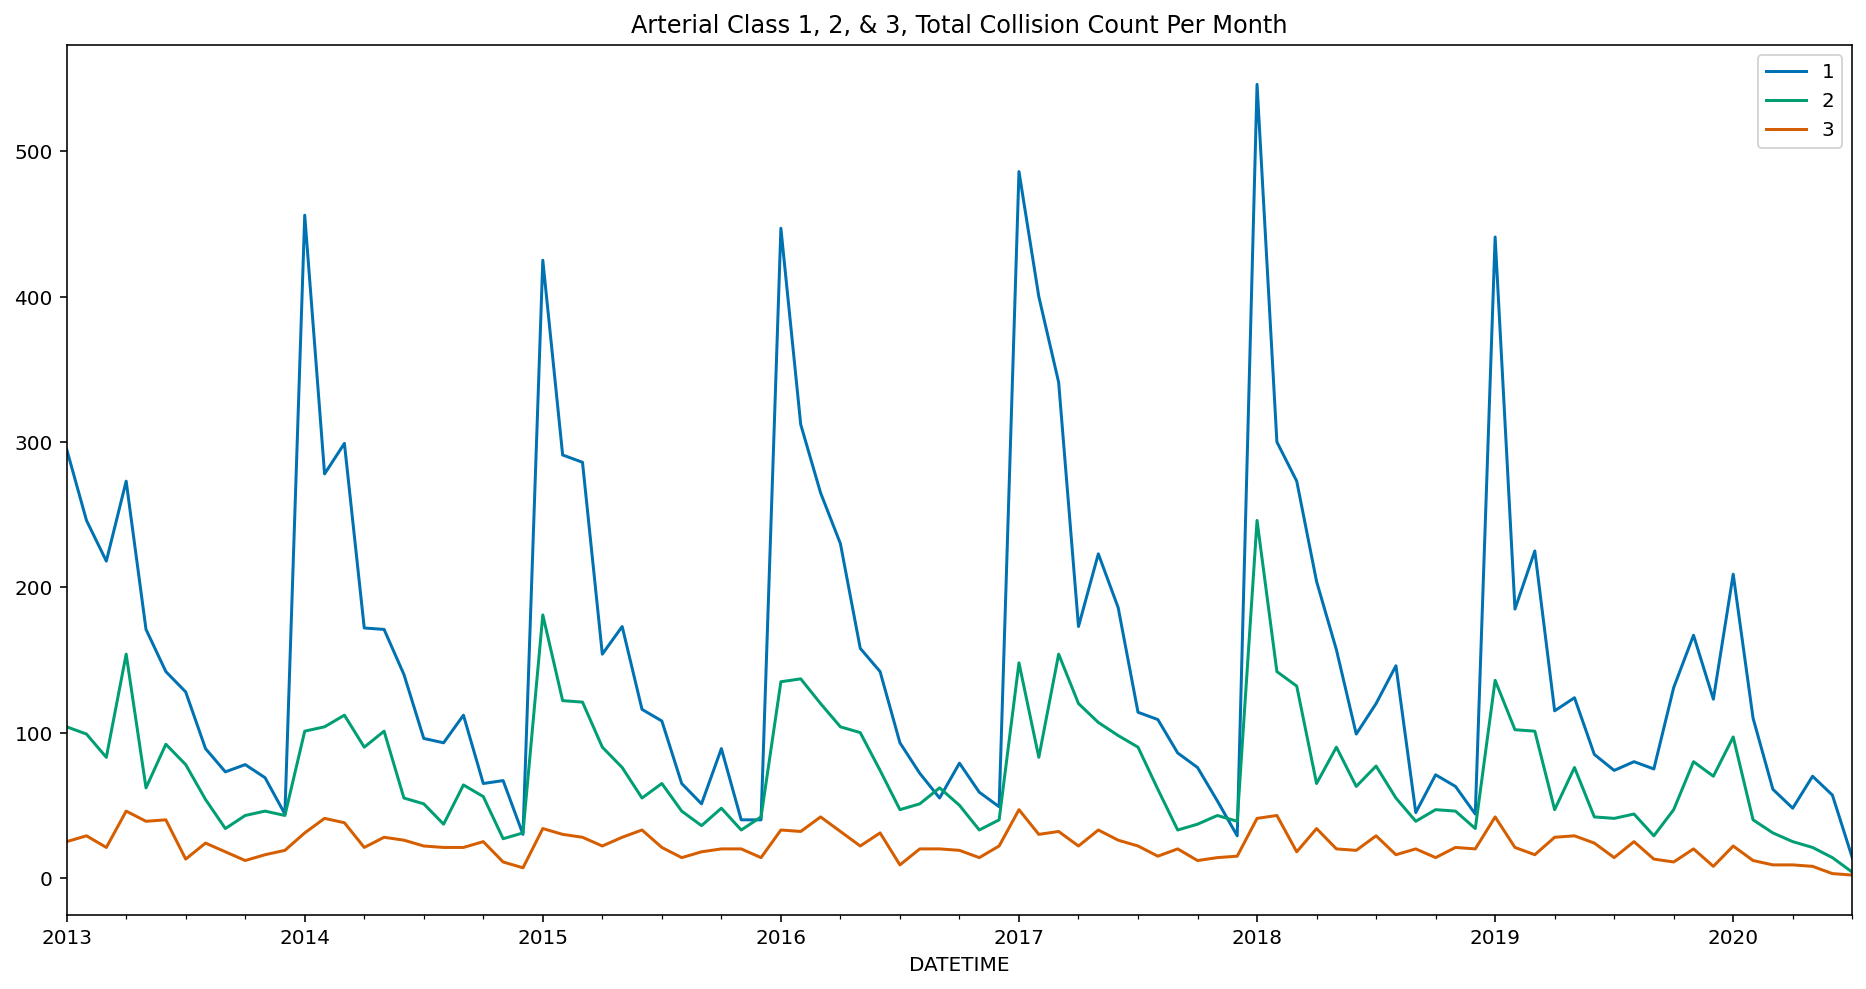

In [52]:
df_2013[df_2013['ARTERIALCLASSCD'] == 1].groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].sum().plot(label='1')
df_2013[df_2013['ARTERIALCLASSCD'] == 2].groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].sum().plot(label='2')
df_2013[df_2013['ARTERIALCLASSCD'] == 3].groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].sum().plot(label='3',title='Arterial Class 1, 2, & 3, Total Collision Count Per Month').legend();

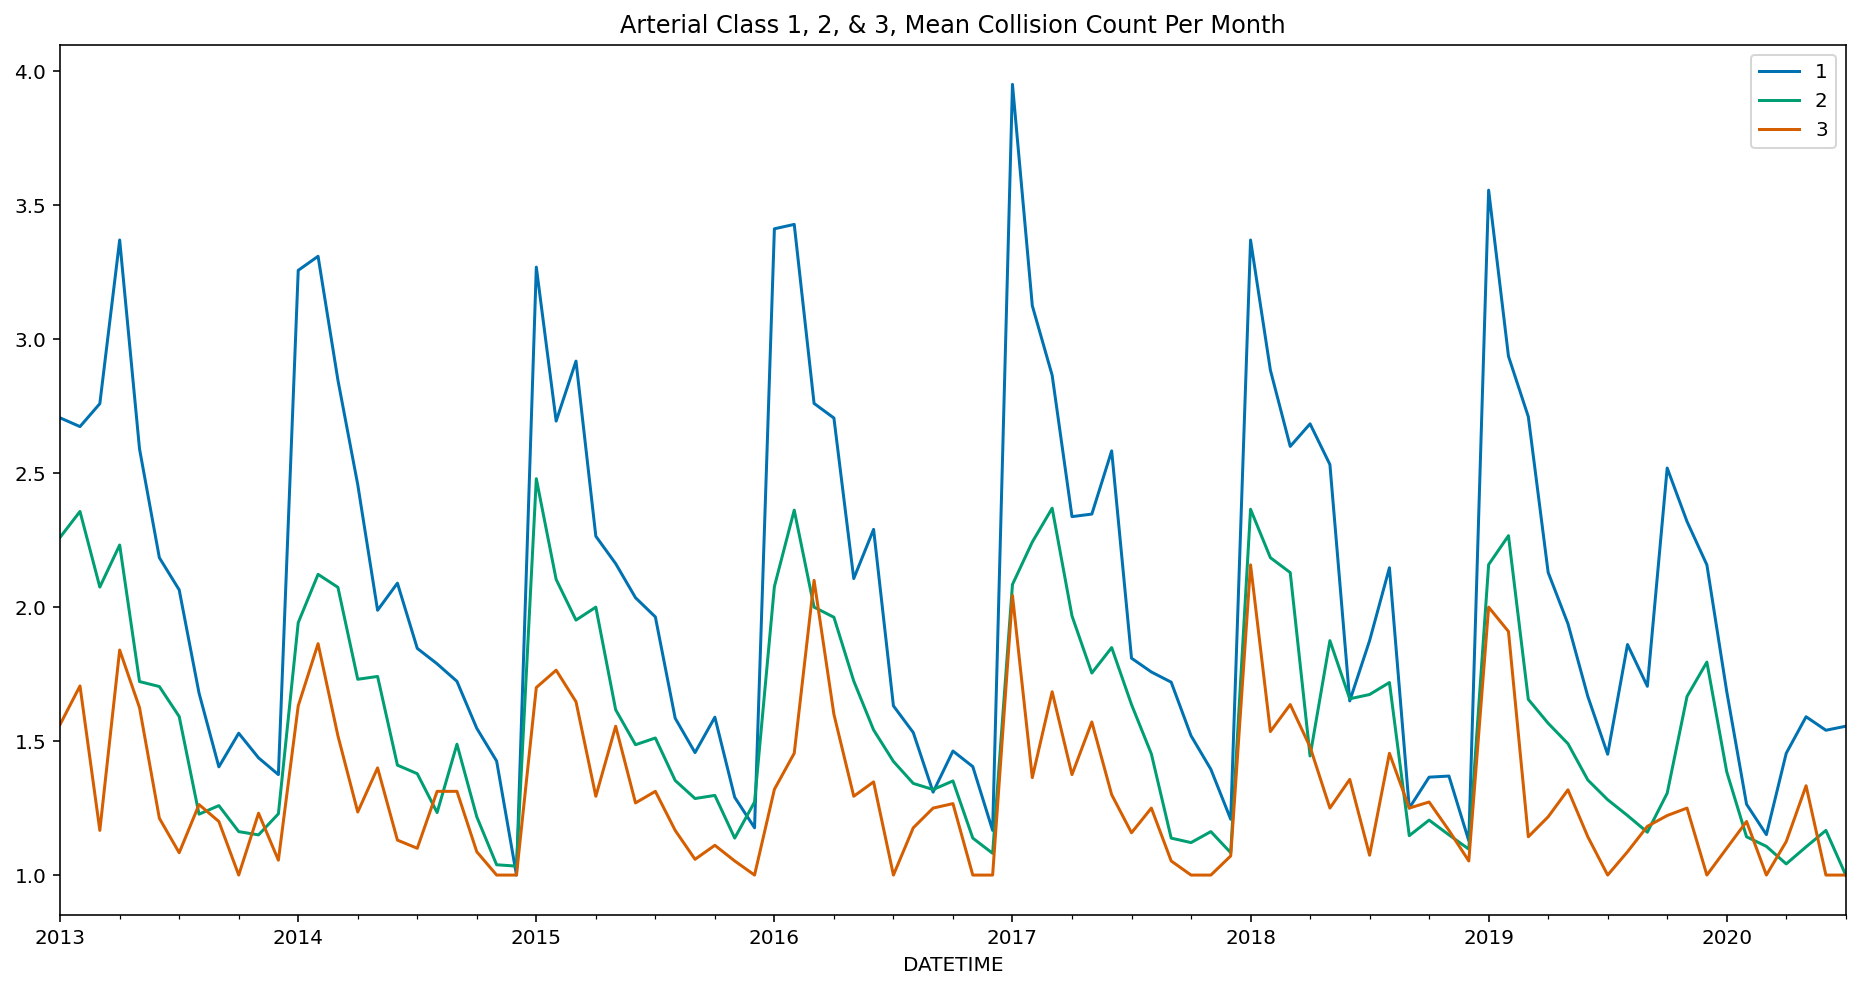

In [53]:
df_2013[df_2013['ARTERIALCLASSCD'] == 1].groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].mean().plot(label='1')
df_2013[df_2013['ARTERIALCLASSCD'] == 2].groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].mean().plot(label='2')
df_2013[df_2013['ARTERIALCLASSCD'] == 3].groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].mean().plot(label='3',title='Arterial Class 1, 2, & 3, Mean Collision Count Per Month').legend();

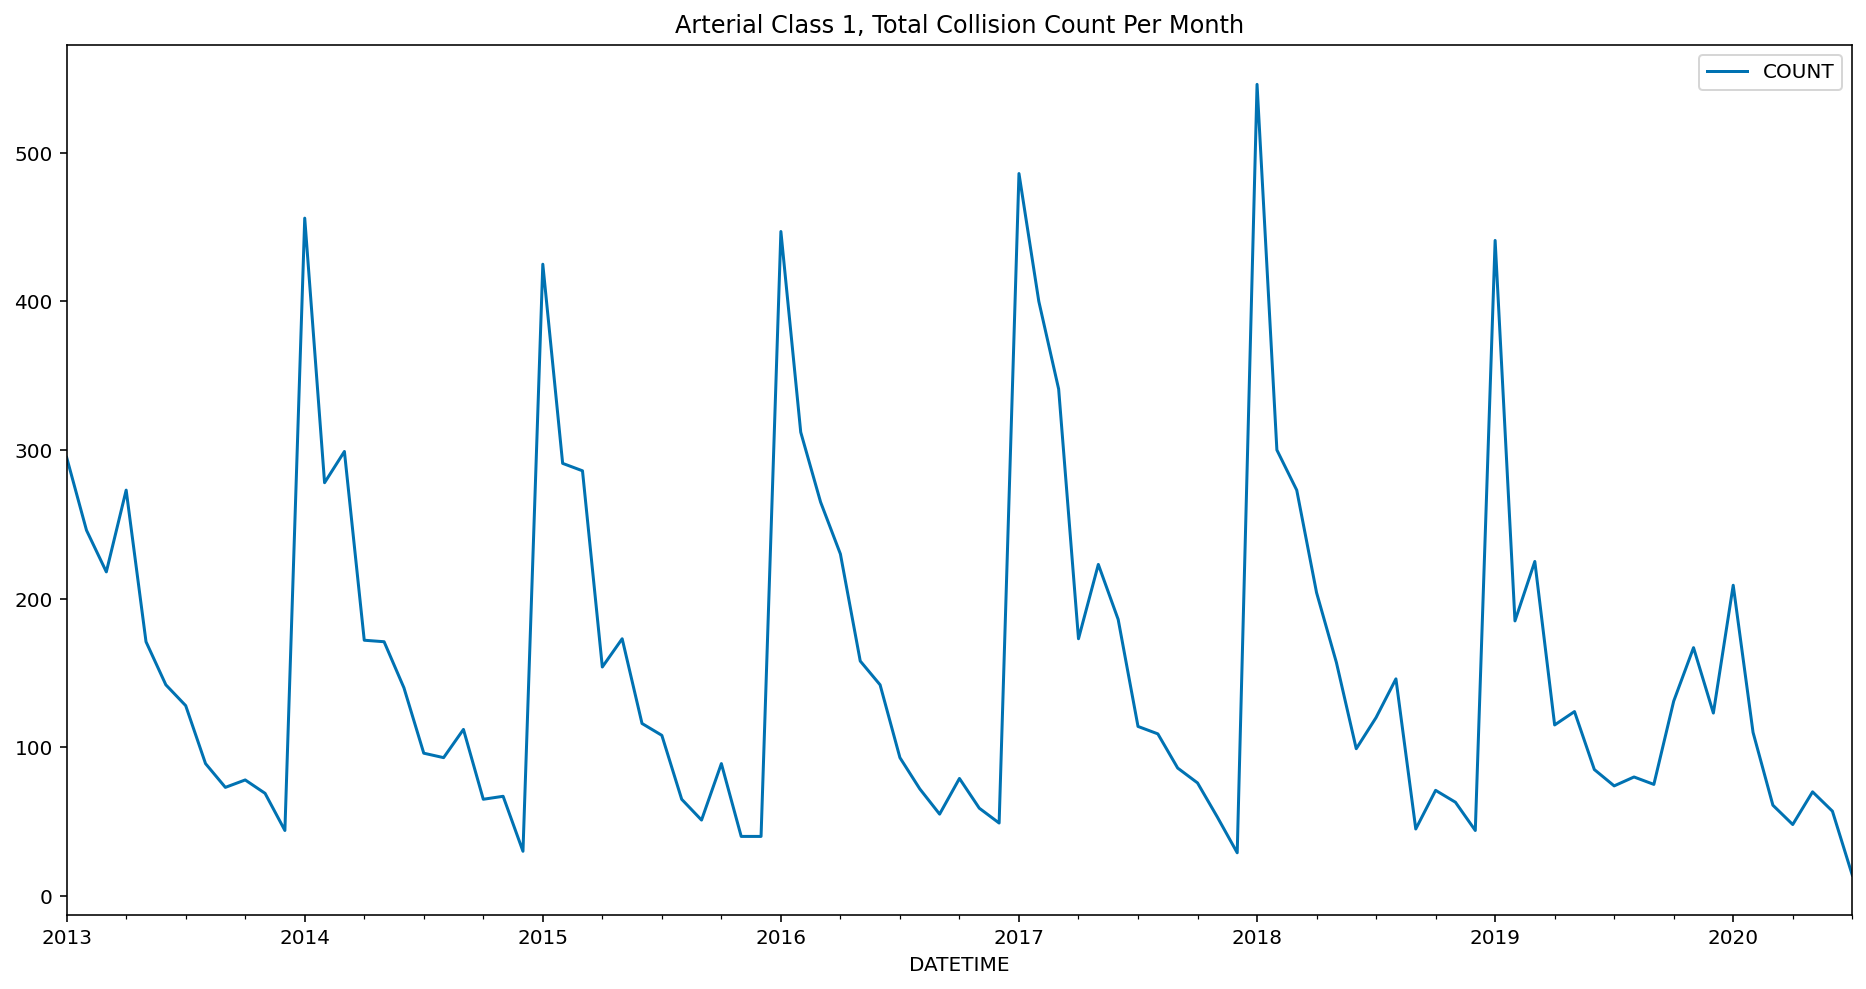

In [175]:
df_2013[df_2013['ARTERIALCLASSCD'] == 1].groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].sum().plot(title='Arterial Class 1, Total Collision Count Per Month').legend();

We see this a similar seasonality in Arterial Classes 2 and 3, however they are not as pronounced and appear more frequent. Let's get a closer look at Arterial Class 1 with a predictive model.

In [55]:
art_class1 = df_2013[df_2013['ARTERIALCLASSCD'] == 1].groupby(pd.Grouper(key='DATETIME', freq='M'))['COUNT'].sum()
art_class1

DATETIME
2013-01-31    295
2013-02-28    246
2013-03-31    218
2013-04-30    273
2013-05-31    171
             ... 
2020-03-31     61
2020-04-30     48
2020-05-31     70
2020-06-30     57
2020-07-31     14
Freq: M, Name: COUNT, Length: 91, dtype: int64

Working with code from [this](https://www.tensorflow.org/probability/examples/Probabilistic_Layers_Regression) example of Tensorflow Probability.

In [67]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [71]:
class RBFKernelFn(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super(RBFKernelFn, self).__init__(**kwargs)
    dtype = kwargs.get('dtype', None)

    self._amplitude = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype,
            name='amplitude')
    
    self._length_scale = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype,
            name='length_scale')

  def call(self, x):
    # Never called -- this is just a layer so it can hold variables
    # in a way Keras understands.
    return x

  @property
  def kernel(self):
    return tfp.math.psd_kernels.ExponentiatedQuadratic(
      amplitude=tf.nn.softplus(0.1 * self._amplitude),
      length_scale=tf.nn.softplus(5. * self._length_scale)
    )


In [91]:
ac_df = art_class1.reset_index()

In [135]:
x = ac_df.index.to_numpy(dtype=int)
y = ac_df['COUNT'].astype(float)
x_range = [0, x.shape[0]]

In [160]:
# For numeric stability, set the default floating-point dtype to float64
tf.keras.backend.set_floatx('float64')

# Build model.
num_inducing_points = 70
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1]),
    tf.keras.layers.Dense(1, kernel_initializer='ones', use_bias=False),
    tfp.layers.VariationalGaussianProcess(
        num_inducing_points=num_inducing_points,
        kernel_provider=RBFKernelFn(),
        event_shape=[1],
        inducing_index_points_initializer=tf.constant_initializer(
            np.linspace(*x_range, num=num_inducing_points,
                        dtype=x.dtype)[..., np.newaxis]),
        unconstrained_observation_noise_variance_initializer=(
            tf.constant_initializer(np.array(0.54).astype(x.dtype))),
    ),
])


/home/feli/anaconda3/lib/python3.7/site-packages/tensorflow_probability/python/distributions/gaussian_process.py:311: UserWarning: Unable to detect statically whether the number of index_points is 1. As a result, defaulting to treating the marginal GP at `index_points` as a multivariate Gaussian. This makes some methods, like `cdf` unavailable.
  'Unable to detect statically whether the number of index_points is '


In [161]:
# Do inference.
batch_size = 10
loss = lambda y, rv_y: rv_y.variational_loss(
    y, kl_weight=np.array(batch_size, x.dtype) / x.shape[0])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=loss)
model.fit(x, y, batch_size=batch_size, epochs=1000, verbose=False)

# Profit.
yhat = model(x)
assert isinstance(yhat, tfd.Distribution)


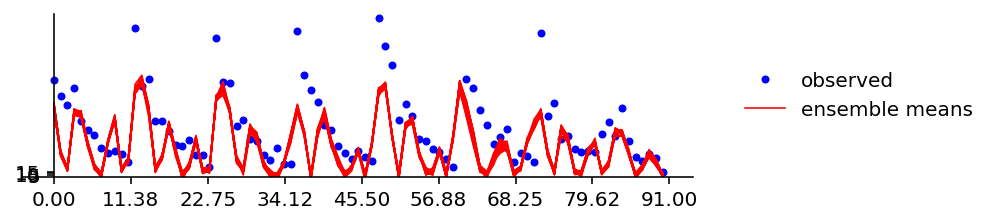

In [162]:
plt.figure(figsize=[6, 1.5])  # inches
plt.plot(x, y, 'b.', label='observed')

num_samples = 27
for i in range(num_samples):
  sample_ = yhat.sample().numpy()
  plt.plot(x,
           sample_[..., 0].T,
           'r',
           linewidth=0.8,
           label='ensemble means' if i == 0 else None);

plt.ylim(0.,500);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig5.png', bbox_inches='tight', dpi=300)
